In [715]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as mc
import statsmodels.formula.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Data Understandin & Preprocessing

In [716]:
data = pd.read_csv("imdb_top_1000.csv")
data

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [717]:
data.drop(["Poster_Link","Series_Title","Overview" ,"Director","Star1","Star2","Star3","Star4"] ,axis =1 ,inplace = True)
data

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,1994,A,142 min,Drama,9.3,80.0,2343110,"28,341,469"
1,1972,A,175 min,"Crime, Drama",9.2,100.0,1620367,"134,966,411"
2,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,2303232,"534,858,444"
3,1974,A,202 min,"Crime, Drama",9.0,90.0,1129952,"57,300,000"
4,1957,U,96 min,"Crime, Drama",9.0,96.0,689845,"4,360,000"
...,...,...,...,...,...,...,...,...
995,1961,A,115 min,"Comedy, Drama, Romance",7.6,76.0,166544,NaN
996,1956,G,201 min,"Drama, Western",7.6,84.0,34075,NaN
997,1953,Passed,118 min,"Drama, Romance, War",7.6,85.0,43374,"30,500,000"
998,1944,NaN,97 min,"Drama, War",7.6,78.0,26471,NaN


In [718]:
data.loc[200:220,["Certificate","Gross","No_of_Votes"]]

,Certificate,Gross,No_of_Votes
200,R,"3,492,754",50700
201,UA,"901,610",50445
202,A,"226,277,068",647884
203,R,"14,677,674",371538
204,R,"3,107,072",177059
205,U,NaN,159171
206,NaN,"165,520",46547
207,UA,"10,616,104",163061
208,U,"923,221",51739
209,UA,"59,100,318",707630


In [719]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Released_Year  1000 non-null   object 
 1   Certificate    899 non-null    object 
 2   Runtime        1000 non-null   object 
 3   Genre          1000 non-null   object 
 4   IMDB_Rating    1000 non-null   float64
 5   Meta_score     843 non-null    float64
 6   No_of_Votes    1000 non-null   int64  
 7   Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


In [720]:
data.dropna(inplace = True)

In [721]:
data.isnull().sum()

Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Meta_score       0
No_of_Votes      0
Gross            0
dtype: int64

In [722]:
for i in data.index:
    data["Gross"][i] =int(data["Gross"][i].replace("," , ""))
    data["Runtime"][i] =int(data["Runtime"][i].replace(" min" , ""))    

C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_6652/3923638534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Gross"][i] =int(data["Gross"][i].replace("," , ""))
C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_6652/3923638534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Runtime"][i] =int(data["Runtime"][i].replace(" min" , ""))


In [723]:
data

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,1994,A,142,Drama,9.3,80.0,2343110,28341469
1,1972,A,175,"Crime, Drama",9.2,100.0,1620367,134966411
2,2008,UA,152,"Action, Crime, Drama",9.0,84.0,2303232,534858444
3,1974,A,202,"Crime, Drama",9.0,90.0,1129952,57300000
4,1957,U,96,"Crime, Drama",9.0,96.0,689845,4360000
...,...,...,...,...,...,...,...,...
990,1971,PG,157,"Drama, War, Western",7.6,77.0,30144,696690
991,1970,GP,144,"Adventure, Comedy, War",7.6,50.0,45338,1378435
992,1967,U,78,"Animation, Adventure, Family",7.6,65.0,166409,141843612
994,1964,U,87,"Comedy, Music, Musical",7.6,96.0,40351,13780024


In [724]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 997
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Released_Year  714 non-null    object 
 1   Certificate    714 non-null    object 
 2   Runtime        714 non-null    object 
 3   Genre          714 non-null    object 
 4   IMDB_Rating    714 non-null    float64
 5   Meta_score     714 non-null    float64
 6   No_of_Votes    714 non-null    int64  
 7   Gross          714 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 66.4+ KB


In [725]:
data["Gross"]=data["Gross"].astype(int)

In [726]:
data

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,1994,A,142,Drama,9.3,80.0,2343110,28341469
1,1972,A,175,"Crime, Drama",9.2,100.0,1620367,134966411
2,2008,UA,152,"Action, Crime, Drama",9.0,84.0,2303232,534858444
3,1974,A,202,"Crime, Drama",9.0,90.0,1129952,57300000
4,1957,U,96,"Crime, Drama",9.0,96.0,689845,4360000
...,...,...,...,...,...,...,...,...
990,1971,PG,157,"Drama, War, Western",7.6,77.0,30144,696690
991,1970,GP,144,"Adventure, Comedy, War",7.6,50.0,45338,1378435
992,1967,U,78,"Animation, Adventure, Family",7.6,65.0,166409,141843612
994,1964,U,87,"Comedy, Music, Musical",7.6,96.0,40351,13780024


In [727]:
imb = data.IMDB_Rating

In [728]:
data.drop(["IMDB_Rating"],axis = 1 ,inplace= True)

In [729]:
data =pd.concat([data,imb],axis =1)

In [730]:
data

,Released_Year,Certificate,Runtime,Genre,Meta_score,No_of_Votes,Gross,IMDB_Rating
0,1994,A,142,Drama,80.0,2343110,28341469,9.3
1,1972,A,175,"Crime, Drama",100.0,1620367,134966411,9.2
2,2008,UA,152,"Action, Crime, Drama",84.0,2303232,534858444,9.0
3,1974,A,202,"Crime, Drama",90.0,1129952,57300000,9.0
4,1957,U,96,"Crime, Drama",96.0,689845,4360000,9.0
...,...,...,...,...,...,...,...,...
990,1971,PG,157,"Drama, War, Western",77.0,30144,696690,7.6
991,1970,GP,144,"Adventure, Comedy, War",50.0,45338,1378435,7.6
992,1967,U,78,"Animation, Adventure, Family",65.0,166409,141843612,7.6
994,1964,U,87,"Comedy, Music, Musical",96.0,40351,13780024,7.6


# Categorical Data

In [731]:
le=LabelEncoder()

In [732]:
data.Genre.unique()

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Action, Adventure, Drama', 'Biography, Drama, History',
       'Action, Adventure, Sci-Fi', 'Drama, Romance', 'Western',
       'Action, Sci-Fi', 'Biography, Crime, Drama',
       'Action, Adventure, Fantasy', 'Comedy, Drama, Thriller',
       'Adventure, Drama, Sci-Fi', 'Animation, Adventure, Family',
       'Drama, War', 'Crime, Drama, Fantasy', 'Comedy, Drama, Romance',
       'Crime, Drama, Mystery', 'Crime, Drama, Thriller', 'Drama, Music',
       'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi',
       'Biography, Drama, Music', 'Crime, Mystery, Thriller',
       'Animation, Adventure, Drama', 'Adventure, Comedy, Sci-Fi',
       'Horror, Mystery, Thriller', 'Drama, Romance, War',
       'Comedy, Drama, Family', 'Animation, Drama, Fantasy',
       'Animation, Action, Adventure', 'Drama, Western',
       'Action, Adventure', 'Comedy, Drama', 'Drama, Mystery, Thriller',
       'Action, Drama, Mystery', 'Mystery, Thr

In [733]:
data.Certificate.unique()

array(['A', 'UA', 'U', 'R', 'G', 'PG-13', 'PG', 'Passed', 'Approved',
       'TV-PG', 'U/A', 'GP'], dtype=object)

In [734]:
Gen =le.fit_transform(data.Genre)
Gen

array([117, 105,  17, 105, 105,   2, 105,  75,   9, 117,   2, 147, 171,
         2,  28,  72,   4, 117,  92,  44, 105,  59, 157, 106,  91, 110,
       113,   4,   2, 113, 138,  71, 144, 113,  76,   2, 117, 115,  17,
        58,  28, 147,  37, 171, 165, 150,  87,  91, 117,  67,  54,   2,
         9,  59, 159,   0,  86,  59, 145,  22, 170,  54,   0, 134, 146,
       166,  81, 170, 155, 117, 117, 146,  46, 148, 103,  82, 117, 117,
       147, 121,  57,  75, 113, 157,   9,  75, 105,   4,  45, 105,  83,
       112,  52, 171,  32,  91,  51, 168, 101, 107, 142,  71,  83, 143,
        24, 170,  57,  72, 121, 117, 125,  57,  23,   0,  75,  59,  73,
        14, 110, 113, 105, 159,   0,  69,  30,  25,  78,  36,  41, 100,
       116, 117,  47, 147, 149, 117,  23, 154,  92,  33, 145,  75,  57,
        75,  13,  13,  72,  58, 110,   9, 117,  40, 138,  54,  32, 113,
       153,  75,  25, 147, 110,  17,  57,  72, 154,  57,  42, 145, 141,
        86,  84,  85, 147, 117, 113, 147, 143,  83,   9,  72,  8

In [735]:
data.Genre = Gen

In [736]:
data

,Released_Year,Certificate,Runtime,Genre,Meta_score,No_of_Votes,Gross,IMDB_Rating
0,1994,A,142,117,80.0,2343110,28341469,9.3
1,1972,A,175,105,100.0,1620367,134966411,9.2
2,2008,UA,152,17,84.0,2303232,534858444,9.0
3,1974,A,202,105,90.0,1129952,57300000,9.0
4,1957,U,96,105,96.0,689845,4360000,9.0
...,...,...,...,...,...,...,...,...
990,1971,PG,157,158,77.0,30144,696690,7.6
991,1970,GP,144,38,50.0,45338,1378435,7.6
992,1967,U,78,59,65.0,166409,141843612,7.6
994,1964,U,87,99,96.0,40351,13780024,7.6


In [737]:
Cer =le.fit_transform(data.Certificate)
Cer

array([ 0,  0, 11,  0,  9,  9,  0,  0, 11,  0,  9, 11,  0, 11,  0,  0, 11,
        0,  0, 11,  0,  9,  7,  0,  9,  0,  0, 11,  9,  0,  0, 11,  9,  0,
        7, 11,  7,  0,  0,  9,  9,  9,  9,  9,  0,  9,  2,  2,  0,  9,  9,
       11, 11,  9,  0, 11, 11,  9,  0,  0, 11,  9,  0,  0,  7,  7,  0,  9,
        7,  7,  5,  7,  0, 11,  9, 11,  0, 11,  9,  4,  9,  0,  7, 11,  9,
        7,  0,  9,  7,  0,  9,  0,  9,  9,  9,  9,  9,  0,  2,  6, 11, 11,
        0,  7, 11,  0,  9,  0,  9,  0, 11,  9,  0, 11,  7,  9, 11,  0,  0,
        0,  0,  0,  9,  9,  0,  9,  0,  4,  9,  9,  0,  6,  6,  7,  0,  7,
        0,  7,  7, 11,  0,  0,  9,  0, 11, 11,  0,  4,  0, 11,  7, 11,  5,
        9,  7,  7, 11,  5,  7,  7, 11,  7,  9,  0,  0,  9,  9,  0,  9,  9,
        7,  7,  9,  0,  0,  7,  9,  9, 11, 11,  9,  9,  0,  9,  9,  0, 11,
        0, 11,  7,  0,  9, 11,  9,  0,  6,  9,  4,  0,  1,  1,  1,  6,  9,
        1,  0,  9, 11,  9,  9,  9, 11,  7,  0, 11, 11, 11,  0, 11,  0, 11,
        9, 11,  7,  8, 11

In [738]:
data.Certificate = Cer

In [739]:
data

,Released_Year,Certificate,Runtime,Genre,Meta_score,No_of_Votes,Gross,IMDB_Rating
0,1994,0,142,117,80.0,2343110,28341469,9.3
1,1972,0,175,105,100.0,1620367,134966411,9.2
2,2008,11,152,17,84.0,2303232,534858444,9.0
3,1974,0,202,105,90.0,1129952,57300000,9.0
4,1957,9,96,105,96.0,689845,4360000,9.0
...,...,...,...,...,...,...,...,...
990,1971,4,157,158,77.0,30144,696690,7.6
991,1970,3,144,38,50.0,45338,1378435,7.6
992,1967,9,78,59,65.0,166409,141843612,7.6
994,1964,9,87,99,96.0,40351,13780024,7.6


In [740]:
data.isnull().sum()

Released_Year    0
Certificate      0
Runtime          0
Genre            0
Meta_score       0
No_of_Votes      0
Gross            0
IMDB_Rating      0
dtype: int64

# Linear Regression (1)

In [741]:
x = data.loc[:500,["No_of_Votes"]]
y= data.loc[:500,["IMDB_Rating"]]

In [742]:
x_test = data.loc[501:,["No_of_Votes"]]
y_desired = data.loc[501:,["IMDB_Rating"]]

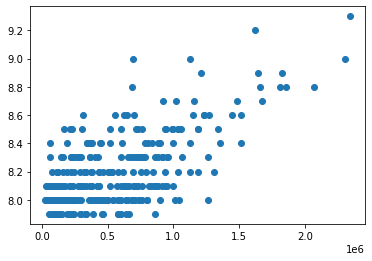

In [743]:
plt.scatter(x,y)

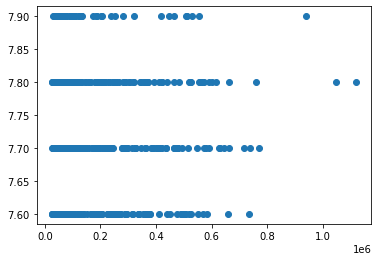

In [744]:
plt.scatter(x_test , y_desired) 

In [745]:
model =LinearRegression()

In [746]:
model.fit(x,y)

LinearRegression()

In [747]:
y_predict = model.predict(x_test)

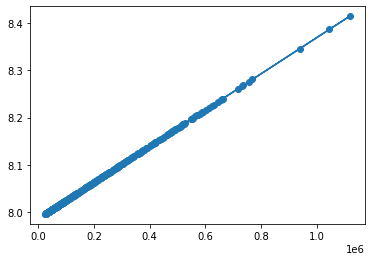

In [748]:
plt.scatter(x_test , y_predict) 
plt.plot(x_test , y_predict) 

In [749]:
model.intercept_ #linearity

array([7.98722192])

In [750]:
model.coef_ #slope

array([[3.81387084e-07]])

In [751]:
mc.mean_absolute_error(y_desired , y_predict)

0.3493570053606555

In [752]:
mc.mean_squared_error(y_desired , y_predict)

0.13739798712046447

# Linear Regression (2)

In [753]:
x = data[["Meta_score","No_of_Votes" ]] 
y = data.IMDB_Rating

In [754]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = .2)
x_test

,Meta_score,No_of_Votes
271,57.0,371271
740,72.0,380195
515,85.0,322031
98,84.0,1069738
764,78.0,474141
...,...,...
878,71.0,140840
923,66.0,82781
536,84.0,103031
832,62.0,115677


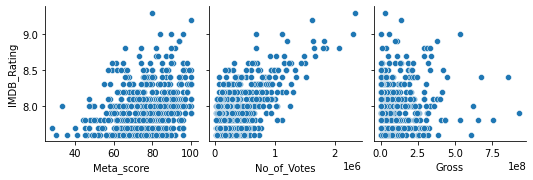

In [755]:
sns.pairplot(data,x_vars=["Meta_score","No_of_Votes" ,"Gross"] , y_vars=["IMDB_Rating"] ,diag_kind=None , kind= "scatter")

In [756]:
model.fit(x_train,y_train)

LinearRegression()

In [757]:
y_predict = model.predict(x_test)

In [758]:
mc.mean_squared_error(y_test,y_predict)

0.04988695960961934

# Stats Models

In [759]:
lr = sm.ols(formula = 'IMDB_Rating ~ Meta_score + No_of_Votes' ,data = data[:600]).fit()

In [760]:
y_sm_predict = lr.predict({'Meta_score':72.0 ,'No_of_Votes':142110}) 
y_sm_predict

0    7.853544
dtype: float64

In [761]:
lr.params

Intercept      7.405289e+00
Meta_score     5.291860e-03
No_of_Votes    4.731628e-07
dtype: float64

In [762]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            IMDB_Rating   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     256.4
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           4.29e-81
Time:                        10:53:57   Log-Likelihood:                 102.51
No. Observations:                 600   AIC:                            -199.0
Df Residuals:                     597   BIC:                            -185.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.4053      0.055    134.137      0.000       7.297       7.514
Meta_score      0.0053      0.001      7.648      0.000       0.004       0.007
No_of_Votes  4.732e-07   2.24e-08     21.157      0.000    4.29e-07    5.17e-07
==============================================================================
Omnibus:                       14.596   Durbin-Watson:                   0.811
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.981
Skew:                           0.369   Prob(JB):                     0.000558
Kurtosis:                       3.233   Cond. No.                     3.54e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Polynomial Regression

In [763]:
data

,Released_Year,Certificate,Runtime,Genre,Meta_score,No_of_Votes,Gross,IMDB_Rating
0,1994,0,142,117,80.0,2343110,28341469,9.3
1,1972,0,175,105,100.0,1620367,134966411,9.2
2,2008,11,152,17,84.0,2303232,534858444,9.0
3,1974,0,202,105,90.0,1129952,57300000,9.0
4,1957,9,96,105,96.0,689845,4360000,9.0
...,...,...,...,...,...,...,...,...
990,1971,4,157,158,77.0,30144,696690,7.6
991,1970,3,144,38,50.0,45338,1378435,7.6
992,1967,9,78,59,65.0,166409,141843612,7.6
994,1964,9,87,99,96.0,40351,13780024,7.6


In [764]:
x = data[["No_of_Votes"]]
y = data.IMDB_Rating

In [765]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = .3)

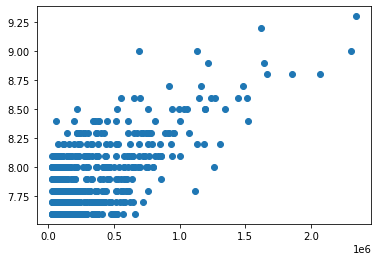

In [766]:
plt.scatter(x_train ,y_train)

In [821]:
polyf = PolynomialFeatures(degree=1)

In [822]:
x_poly =polyf.fit_transform(x_train)

In [823]:
model = LinearRegression()

In [824]:
model.fit(x_poly,y_train)

LinearRegression()

In [825]:
y_poly_predict  = model.predict(x_poly)

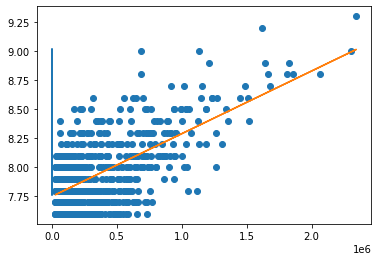

In [826]:
plt.scatter(x,y)
plt.plot(x_poly,y_poly_predict)

# Pipeline (Linear Regression ,Polynomial) 

In [850]:
inpt =[('polynomial' , PolynomialFeatures(degree=3)),('model',LinearRegression())]

In [851]:
pip = Pipeline(inpt)

In [852]:
pip.fit(x_train,y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(degree=3)),
                ('model', LinearRegression())])

In [853]:
y_pip_predict = pip.predict(x_test)

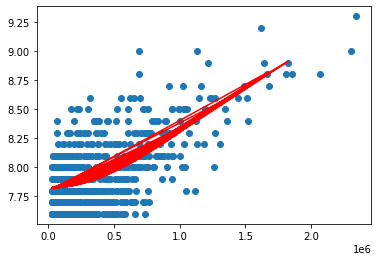

In [854]:
plt.scatter(x,y)
plt.plot(x_test,y_pip_predict, 'r')